# **import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **load the cvs data**

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [5]:
y = y.reshape(len(y),1)

# **Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# **Training the SVR model on the whole data set**

In [9]:
from sklearn.svm import SVR
sv = SVR(kernel='rbf')

In [10]:
regressor = sv.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Predicting the Value**

In [11]:
# print(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
value = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
value

array([[170370.0204065]])

# **Ploting the SVR result**

Text(0, 0.5, 'salary')

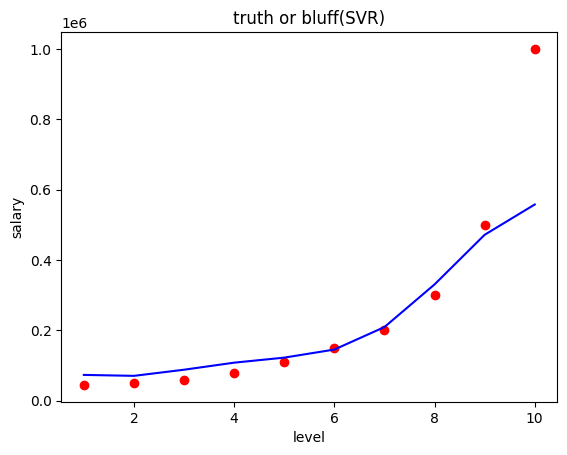

In [17]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y),color = "red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = "blue")
plt.title("truth or bluff(SVR)")
plt.xlabel("level")
plt.ylabel("salary")

# **Visualising the SVR results in high resolution and higher curve**

Text(0, 0.5, 'salary')

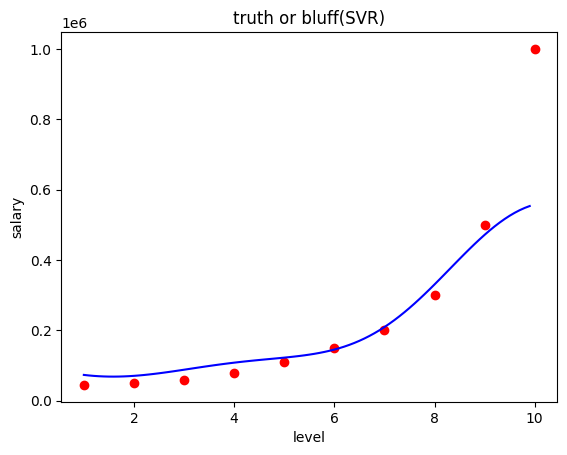

In [23]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y),color = "red")
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = "blue")
plt.title("truth or bluff(SVR)")
plt.xlabel("level")
plt.ylabel("salary")